In [29]:
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt


input_file = "mammographic_masses.data.txt"
df = pd.read_csv(input_file, header = 0)

In [30]:
df.head()

,5,67,3,5.1,3.1,1
0,4,43,1,1,?,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,?,1
4,4,65,1,?,3,0


In [31]:
df = pd.read_csv(input_file, na_values=['?'], names = ['BI-RADS', 'age', 'shape', 'margin', 'density', 'severity'])

In [32]:

df.head()

,BI-RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [33]:
df.describe()

,BI-RADS,age,shape,margin,density,severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [34]:
df.dropna(inplace=True)

In [35]:
# set features
X = df[['age', 'shape', 'margin', 'density']].copy()

# predictor
y = df['severity']

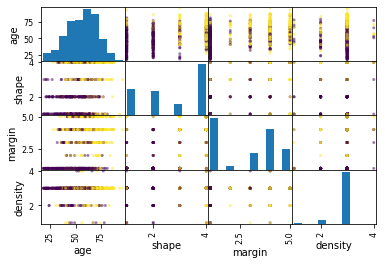

In [36]:
pd.plotting.scatter_matrix(X, c=y)
plt.show()

In [37]:
from sklearn import preprocessing

# normalize the data
scaler = preprocessing.StandardScaler()
scaled_X = scaler.fit_transform(X)

In [38]:
#split train-test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = .25, random_state=42)

In [39]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)


In [40]:
# Predict the labels of the test data: y_pred
y_pred = clf.predict(X_test)

In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Decision Tree confusion matrix\n\n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Decision Tree confusion matrix

 [[84 22]
 [25 77]]
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       106
           1       0.78      0.75      0.77       102

    accuracy                           0.77       208
   macro avg       0.77      0.77      0.77       208
weighted avg       0.77      0.77      0.77       208



In [42]:
#tree print

In [43]:
clf.score(X_test, y_test)

0.7740384615384616

In [44]:
#K-fold
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=10)

# Print the accuracy for each fold:
print(scores)

# And the mean accuracy of all 5 folds:
print('Decision Tree Cross Validation score: ', '{:.2%}'.format(scores.mean()))

[0.73493976 0.74698795 0.72289157 0.74698795 0.75903614 0.71084337
 0.73493976 0.75903614 0.75903614 0.6746988 ]
Decision Tree Cross Validation score:  73.49%


In [45]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train,y_train)

# Predict the labels of the test data: y_pred
y_pred = clf.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# cross val score...
scores = cross_val_score(clf, X, y, cv=10)

print(scores)
print('Random Forest Cross Validation score: ', '{:.2%}'.format(scores.mean()))

[[81 25]
 [17 85]]
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       106
           1       0.77      0.83      0.80       102

    accuracy                           0.80       208
   macro avg       0.80      0.80      0.80       208
weighted avg       0.80      0.80      0.80       208

[0.77108434 0.75903614 0.77108434 0.84337349 0.75903614 0.72289157
 0.79518072 0.77108434 0.81927711 0.68674699]
Random Forest Cross Validation score:  76.99%


In [46]:
#Hyperparameter tuning for Random Forest
from pprint import pprint

print('Current Parameters:')
pprint(clf.get_params())

Current Parameters:
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [47]:
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# number of features to consider at every split
max_features = ['auto', 'sqrt']

# max number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# min number of samples required to split a node
min_samples_split = [2, 5, 10]

# min number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# method of selecting samples for training each tree
bootstrap = [True, False]

In [48]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [49]:
#RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# random search of parameters...
clf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), 
                                param_distributions = random_grid, 
                                n_iter = 100, 
                                cv = 3, 
                                verbose=1, 
                                random_state=42, 
                                n_jobs = -1)

# Fit the random search model
clf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=1)

In [50]:
print(clf_random.best_params_)

{'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': True}


In [51]:
#Reclassify with best parameters
clf = RandomForestClassifier(n_estimators= 800, min_samples_split=10, min_samples_leaf=4, max_features='sqrt', max_depth=50, bootstrap= True)
clf = clf.fit(X_train,y_train)

# Predict the labels of the test data: y_pred
y_pred = clf.predict(X_test)

scores = cross_val_score(clf, X, y, cv=10)

print(scores)
print('Random Forest after parameter tuning: ', '{:.2%}'.format(scores.mean()))

[0.78313253 0.81927711 0.85542169 0.78313253 0.86746988 0.74698795
 0.80722892 0.79518072 0.86746988 0.74698795]
Random Forest after parameter tuning:  80.72%


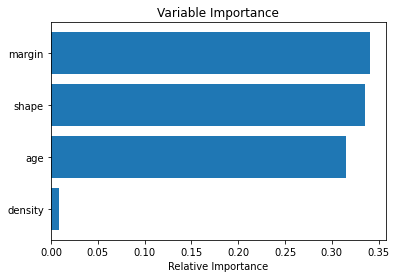

In [52]:
#RandomForest Feature Importance

importances = clf.feature_importances_
sorted_idx = np.argsort(importances)

features = X.columns

padding = np.arange(len(features)) + 0.5
plt.barh(padding, importances[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

In [53]:
#SVM

from sklearn import svm, datasets

C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(X_train,y_train)

# predict...
y_pred = svc.predict(X_test)

# cross val score...
scores = cross_val_score(svc, X, y, cv=10)

print(scores)
print('SVM score: ', '{:.2%}'.format(scores.mean()))

[0.71084337 0.79518072 0.84337349 0.80722892 0.84337349 0.73493976
 0.79518072 0.81927711 0.87951807 0.75903614]
SVM score:  79.88%


In [54]:
#Hyperparameter tuning SVM

print('Current Parameters:')
pprint(svc.get_params())

Current Parameters:
{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [57]:
# setup parameters
parameters = {
    'C':            np.arange( 1, 10+1, 1 ).tolist(),
    'kernel':       ['linear', 'rbf', 'poly', 'sigmoid'],                  # precomputed,'poly', 'sigmoid'
    'degree':       np.arange( 0, 10+0, 1 ).tolist(),    
    'gamma':        np.arange( 0.0, 1.0+0.0, 0.1 ).tolist(),               # np.arange( 0.0, 10.0+0.0, 0.1 ).tolist(),
    'coef0':        np.arange( 0.0, 1.0+0.0, 0.1 ).tolist(),               # np.arange( 0.0, 10.0+0.0, 0.1 ).tolist(), 
    'shrinking':    [True],
    'probability':  [False],
    'tol':          np.arange( 0.001, 0.01+0.001, 0.001 ).tolist(),
    'cache_size':   [2000],
    #'class_weight': [None],
    #'verbose':      [False],
    'max_iter':     [-1],    
}

# TODO - setup to run in parellel 
model = RandomizedSearchCV(n_iter = 100,
                          estimator = svm.SVC(),
                          param_distributions = parameters,
                          n_jobs = -1,
                          refit = True,
                          cv = 5,
                          verbose = 2,
                          random_state = 42)

# fit
model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                                        'cache_size': [2000],
                                        'coef0': [0.0, 0.1, 0.2,
                                                  0.30000000000000004, 0.4, 0.5,
                                                  0.6000000000000001,
                                                  0.7000000000000001, 0.8,
                                                  0.9],
                                        'degree': [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                   9],
                                        'gamma': [0.0, 0.1, 0.2,
                                                  0.30000000000000004, 0.4, 0.5,
                                                  0.6000000000000001,
                                                  0.7000000000000001, 0.8,
                        

In [58]:
print('SVM Best Score: ', '{:.2%}'.format(model.best_score_))
print('SVM Best Estimator:')
print( model.best_estimator_)
print('SVM Best Model Parameters:')
print( model.best_params_)

SVM Best Score:  79.91%
SVM Best Estimator:
SVC(C=1, cache_size=2000, coef0=0.9, degree=2, gamma=0.6000000000000001,
    kernel='poly', tol=0.006)
SVM Best Model Parameters:
{'tol': 0.006, 'shrinking': True, 'probability': False, 'max_iter': -1, 'kernel': 'poly', 'gamma': 0.6000000000000001, 'degree': 2, 'coef0': 0.9, 'cache_size': 2000, 'C': 1}


In [59]:
#KNN

from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=10)
scores = cross_val_score(knn, X_train, y_train, cv=10)

print(scores)
print('KNN Score:', '{:.2%}'.format(scores.mean()))

[0.71428571 0.80952381 0.80645161 0.69354839 0.77419355 0.77419355
 0.74193548 0.80645161 0.74193548 0.77419355]
KNN Score: 76.37%


In [60]:
for n in range(1, 50):
    knn = neighbors.KNeighborsClassifier(n_neighbors=n)
    scores = cross_val_score(knn, X_train, y_train, cv=10)
    print('KNN Score:', '{:.2%}'.format(scores.mean()))

KNN Score: 71.21%
KNN Score: 68.16%
KNN Score: 72.83%
KNN Score: 71.54%
KNN Score: 76.70%
KNN Score: 74.76%
KNN Score: 76.53%
KNN Score: 75.40%
KNN Score: 77.50%
KNN Score: 76.37%
KNN Score: 77.81%
KNN Score: 77.01%
KNN Score: 78.13%
KNN Score: 77.65%
KNN Score: 79.10%
KNN Score: 78.62%
KNN Score: 78.14%
KNN Score: 78.14%
KNN Score: 78.46%
KNN Score: 78.63%
KNN Score: 78.63%
KNN Score: 78.14%
KNN Score: 78.46%
KNN Score: 78.14%
KNN Score: 78.14%
KNN Score: 78.46%
KNN Score: 78.14%
KNN Score: 78.30%
KNN Score: 77.98%
KNN Score: 77.98%
KNN Score: 78.30%
KNN Score: 78.14%
KNN Score: 78.14%
KNN Score: 78.14%
KNN Score: 78.14%
KNN Score: 78.14%
KNN Score: 78.30%
KNN Score: 78.14%
KNN Score: 78.14%
KNN Score: 78.30%
KNN Score: 78.62%
KNN Score: 78.62%
KNN Score: 79.10%
KNN Score: 78.62%
KNN Score: 78.62%
KNN Score: 78.62%
KNN Score: 78.62%
KNN Score: 78.62%
KNN Score: 78.78%


In [61]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB

scaler = preprocessing.MinMaxScaler()
all_features_minmax = scaler.fit_transform(X_train)

clf = MultinomialNB()

scores = cross_val_score(clf, all_features_minmax, y_train, cv=10)
print(scores)
print('Naive Bayes Score:', '{:.2%}'.format(scores.mean()))

[0.71428571 0.76190476 0.75806452 0.72580645 0.82258065 0.80645161
 0.79032258 0.75806452 0.74193548 0.82258065]
Naive Bayes Score: 77.02%


In [62]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

scores = cross_val_score(regressor, X, y, cv=10)

print(scores) 
print('Logistic Regression Score:', '{:.2%}'.format(scores.mean()))

[0.75903614 0.78313253 0.85542169 0.81927711 0.8313253  0.73493976
 0.79518072 0.81927711 0.87951807 0.79518072]
Logistic Regression Score: 80.72%


In [63]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

def create_model():
    model = Sequential()
    #4 feature inputs going into an 6-unit layer (more does not seem to help - in fact you can go down to 4)
    model.add(Dense(6, input_dim=4, kernel_initializer='normal', activation='relu'))
    # "Deep learning" turns out to be unnecessary - this additional hidden layer doesn't help either.
    #model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    # Output layer with a binary classification (benign or malignant)
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model; adam seemed to work best
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [68]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Wrap our Keras model in an estimator compatible with scikit_learn
estimator = KerasClassifier(build_fn=create_model, epochs=100, verbose=0)
# Now we can use scikit_learn's cross_val_score to evaluate this model identically to the others
cv_scores = cross_val_score(estimator, scaled_X, y, cv=10)
cv_scores.mean()

0.7999999940395355